# irisデータセットを使った3層NNの実装と応用

## 必要なライブラリのダウンロード

In [1]:
import numpy as np#数値計算のライブラリ
import pandas as pd#データ分析のライブラリ
import matplotlib.pyplot as plt#グラフ描画のライブラリ
import seaborn as sns#データを可視化するライブラリ
import sklearn#機械学習のライブラリ
from sklearn.datasets import load_iris#irisデータを読み込む
from tensorflow.keras.utils import to_categorical#one-hotベクトル化を行う
from sklearn import preprocessing#
from sklearn.model_selection import train_test_split#トレーニングデータとテストデータに分割する
from tensorflow.keras import Sequential#モデルの宣言
from tensorflow.keras.layers import Dense#全結合層
from tensorflow.keras.models import model_from_json#モデルの保存と読み込み
from tensorflow.keras.utils import plot_model#モデルの可視化

## irisデータの収集

In [2]:
iris = load_iris()

In [3]:
print(iris.data.shape)

(150, 4)


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## irisデータの前処理

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


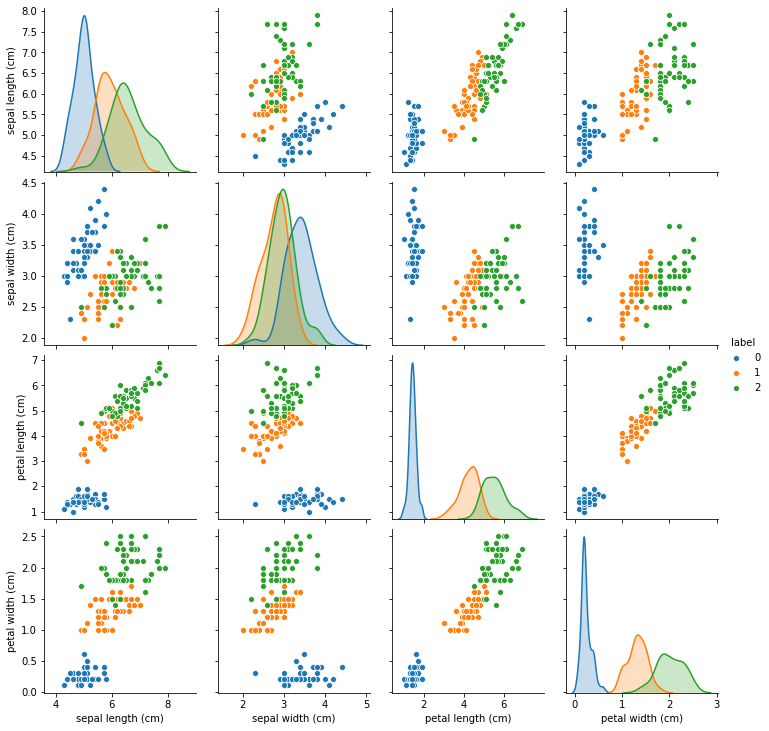

In [7]:
#データの可視化
sns.pairplot(df, hue="label",size=2.5)

In [8]:
df.iloc[:,0:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.iloc[:,0:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64

In [11]:
data_X = preprocessing.scale(df.iloc[:,0:-1])#正規化
data_y = to_categorical(df.iloc[:,-1])#one-hotベクトル化

In [12]:
data_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
data_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [14]:
#トレーニングデータとテストデータに分類


X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [15]:
X_train.shape

(105, 4)

In [16]:
X_test.shape

(45, 4)

In [17]:
y_train.shape

(105, 3)

In [18]:
y_test.shape

(45, 3)

## モデルの構築

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


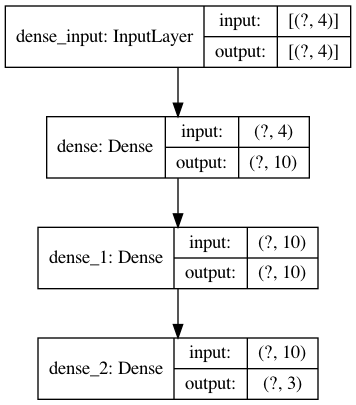

In [19]:
#簡単な3層のモデルの実装
model1 = Sequential()
model1.add(Dense(10,activation ="relu",input_dim=4))
model1.add(Dense(10,activation="relu"))
model1.add(Dense(3,activation="softmax"))

model1.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics = ["accuracy"])

model1.summary()
plot_model(
    model1,
    show_shapes=True,
)

In [20]:
history1 = model1.fit(X_train,y_train,
                   epochs=20,
                    verbose=2
                   )

Epoch 1/20
4/4 - 0s - loss: 1.1451 - accuracy: 0.4857
Epoch 2/20
4/4 - 0s - loss: 1.1208 - accuracy: 0.4857
Epoch 3/20
4/4 - 0s - loss: 1.0992 - accuracy: 0.4952
Epoch 4/20
4/4 - 0s - loss: 1.0776 - accuracy: 0.4952
Epoch 5/20
4/4 - 0s - loss: 1.0572 - accuracy: 0.5048
Epoch 6/20
4/4 - 0s - loss: 1.0377 - accuracy: 0.5048
Epoch 7/20
4/4 - 0s - loss: 1.0193 - accuracy: 0.5048
Epoch 8/20
4/4 - 0s - loss: 1.0011 - accuracy: 0.5143
Epoch 9/20
4/4 - 0s - loss: 0.9831 - accuracy: 0.5333
Epoch 10/20
4/4 - 0s - loss: 0.9662 - accuracy: 0.5333
Epoch 11/20
4/4 - 0s - loss: 0.9489 - accuracy: 0.5333
Epoch 12/20
4/4 - 0s - loss: 0.9318 - accuracy: 0.5333
Epoch 13/20
4/4 - 0s - loss: 0.9148 - accuracy: 0.5333
Epoch 14/20
4/4 - 0s - loss: 0.8984 - accuracy: 0.5524
Epoch 15/20
4/4 - 0s - loss: 0.8817 - accuracy: 0.5714
Epoch 16/20
4/4 - 0s - loss: 0.8653 - accuracy: 0.5905
Epoch 17/20
4/4 - 0s - loss: 0.8489 - accuracy: 0.6000
Epoch 18/20
4/4 - 0s - loss: 0.8332 - accuracy: 0.6000
Epoch 19/20
4/4 - 0

In [21]:
accuracy = history1.history["accuracy"]
loss = history1.history["loss"]
epochs = range(1, len(loss) + 1)

<function matplotlib.pyplot.show(*args, **kw)>

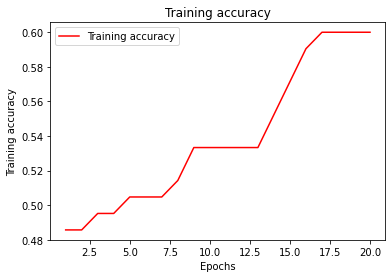

In [22]:
plt.plot(epochs,accuracy,color="red",label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.legend()
plt.show

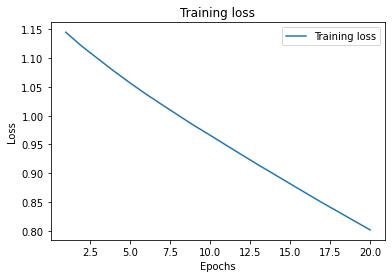

In [23]:
plt.plot(epochs, loss, label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("loss:"+str(loss))
print("accuracy:"+str(accuracy))

loss:0.8016393780708313
accuracy:0.644444465637207


## モデルの再構築

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


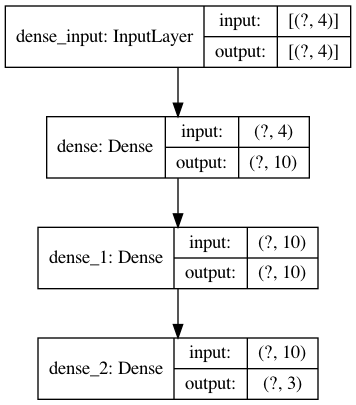

In [25]:
model2= Sequential()#モデルの宣言
model2.add(Dense(100,activation ="relu",input_dim=4))#1層目
model2.add(Dense(100,activation="relu"))#2層目
model2.add(Dense(3,activation="softmax"))#3層目

model2.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics = ["accuracy"],
              )

model2.summary()
plot_model(
    model1,
    show_shapes=True,
)

## 再構築モデルの評価

### トレーニングデータの精度

In [26]:
history2 = model2.fit(X_train,y_train,
                   epochs=100,
                     verbose=2#出力形式→0:表示なし,1;プログラスバー,2:1行の簡潔なログ
                   )

Epoch 1/100
4/4 - 0s - loss: 1.1863 - accuracy: 0.4286
Epoch 2/100
4/4 - 0s - loss: 0.9820 - accuracy: 0.6952
Epoch 3/100
4/4 - 0s - loss: 0.8252 - accuracy: 0.8476
Epoch 4/100
4/4 - 0s - loss: 0.7023 - accuracy: 0.8667
Epoch 5/100
4/4 - 0s - loss: 0.6033 - accuracy: 0.8762
Epoch 6/100
4/4 - 0s - loss: 0.5256 - accuracy: 0.8667
Epoch 7/100
4/4 - 0s - loss: 0.4690 - accuracy: 0.8667
Epoch 8/100
4/4 - 0s - loss: 0.4228 - accuracy: 0.8762
Epoch 9/100
4/4 - 0s - loss: 0.3863 - accuracy: 0.8762
Epoch 10/100
4/4 - 0s - loss: 0.3575 - accuracy: 0.8762
Epoch 11/100
4/4 - 0s - loss: 0.3327 - accuracy: 0.8762
Epoch 12/100
4/4 - 0s - loss: 0.3110 - accuracy: 0.8667
Epoch 13/100
4/4 - 0s - loss: 0.2935 - accuracy: 0.8857
Epoch 14/100
4/4 - 0s - loss: 0.2784 - accuracy: 0.8857
Epoch 15/100
4/4 - 0s - loss: 0.2632 - accuracy: 0.8952
Epoch 16/100
4/4 - 0s - loss: 0.2532 - accuracy: 0.8952
Epoch 17/100
4/4 - 0s - loss: 0.2401 - accuracy: 0.8952
Epoch 18/100
4/4 - 0s - loss: 0.2290 - accuracy: 0.9048
E

In [27]:
accuracy = history2.history["accuracy"]
loss = history2.history["loss"]
epochs = range(1, len(loss) + 1)

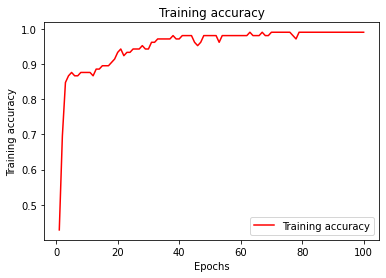

In [28]:
plt.plot(epochs,accuracy,color="red",label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.legend()
plt.show()

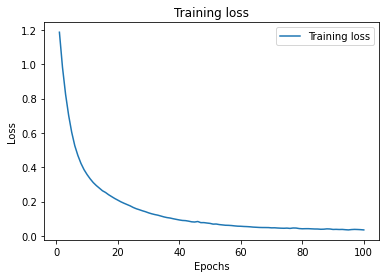

In [29]:
plt.plot(epochs, loss, label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### テストデータで検証

In [30]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.11038047075271606
accuracy: 0.9555555582046509


## おまけ:モデルの保存と読み込み

In [31]:
model_json = model2.to_json()
with open('model_iris100.json', 'w') as file:
    file.write(model_json)#作成したモデルを保存

model2.save_weights('weights.hdf5')#作成したモデルが学習した重みを保存

In [32]:
with open('model_iris100.json', 'r') as file:
    model_json = file.read()
    model = model_from_json(model_json)#作成したモデルを読み込み

model.load_weights('weights.hdf5')#作成したモデルが学習した重みを読み込み

In [33]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.034217022359371185
accuracy: 0.9904761910438538


## 演習問題

In [34]:
from sklearn.datasets import load_wine
wine = load_wine()

In [35]:
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)

In [36]:
df2["label"]=wine.target

In [37]:
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


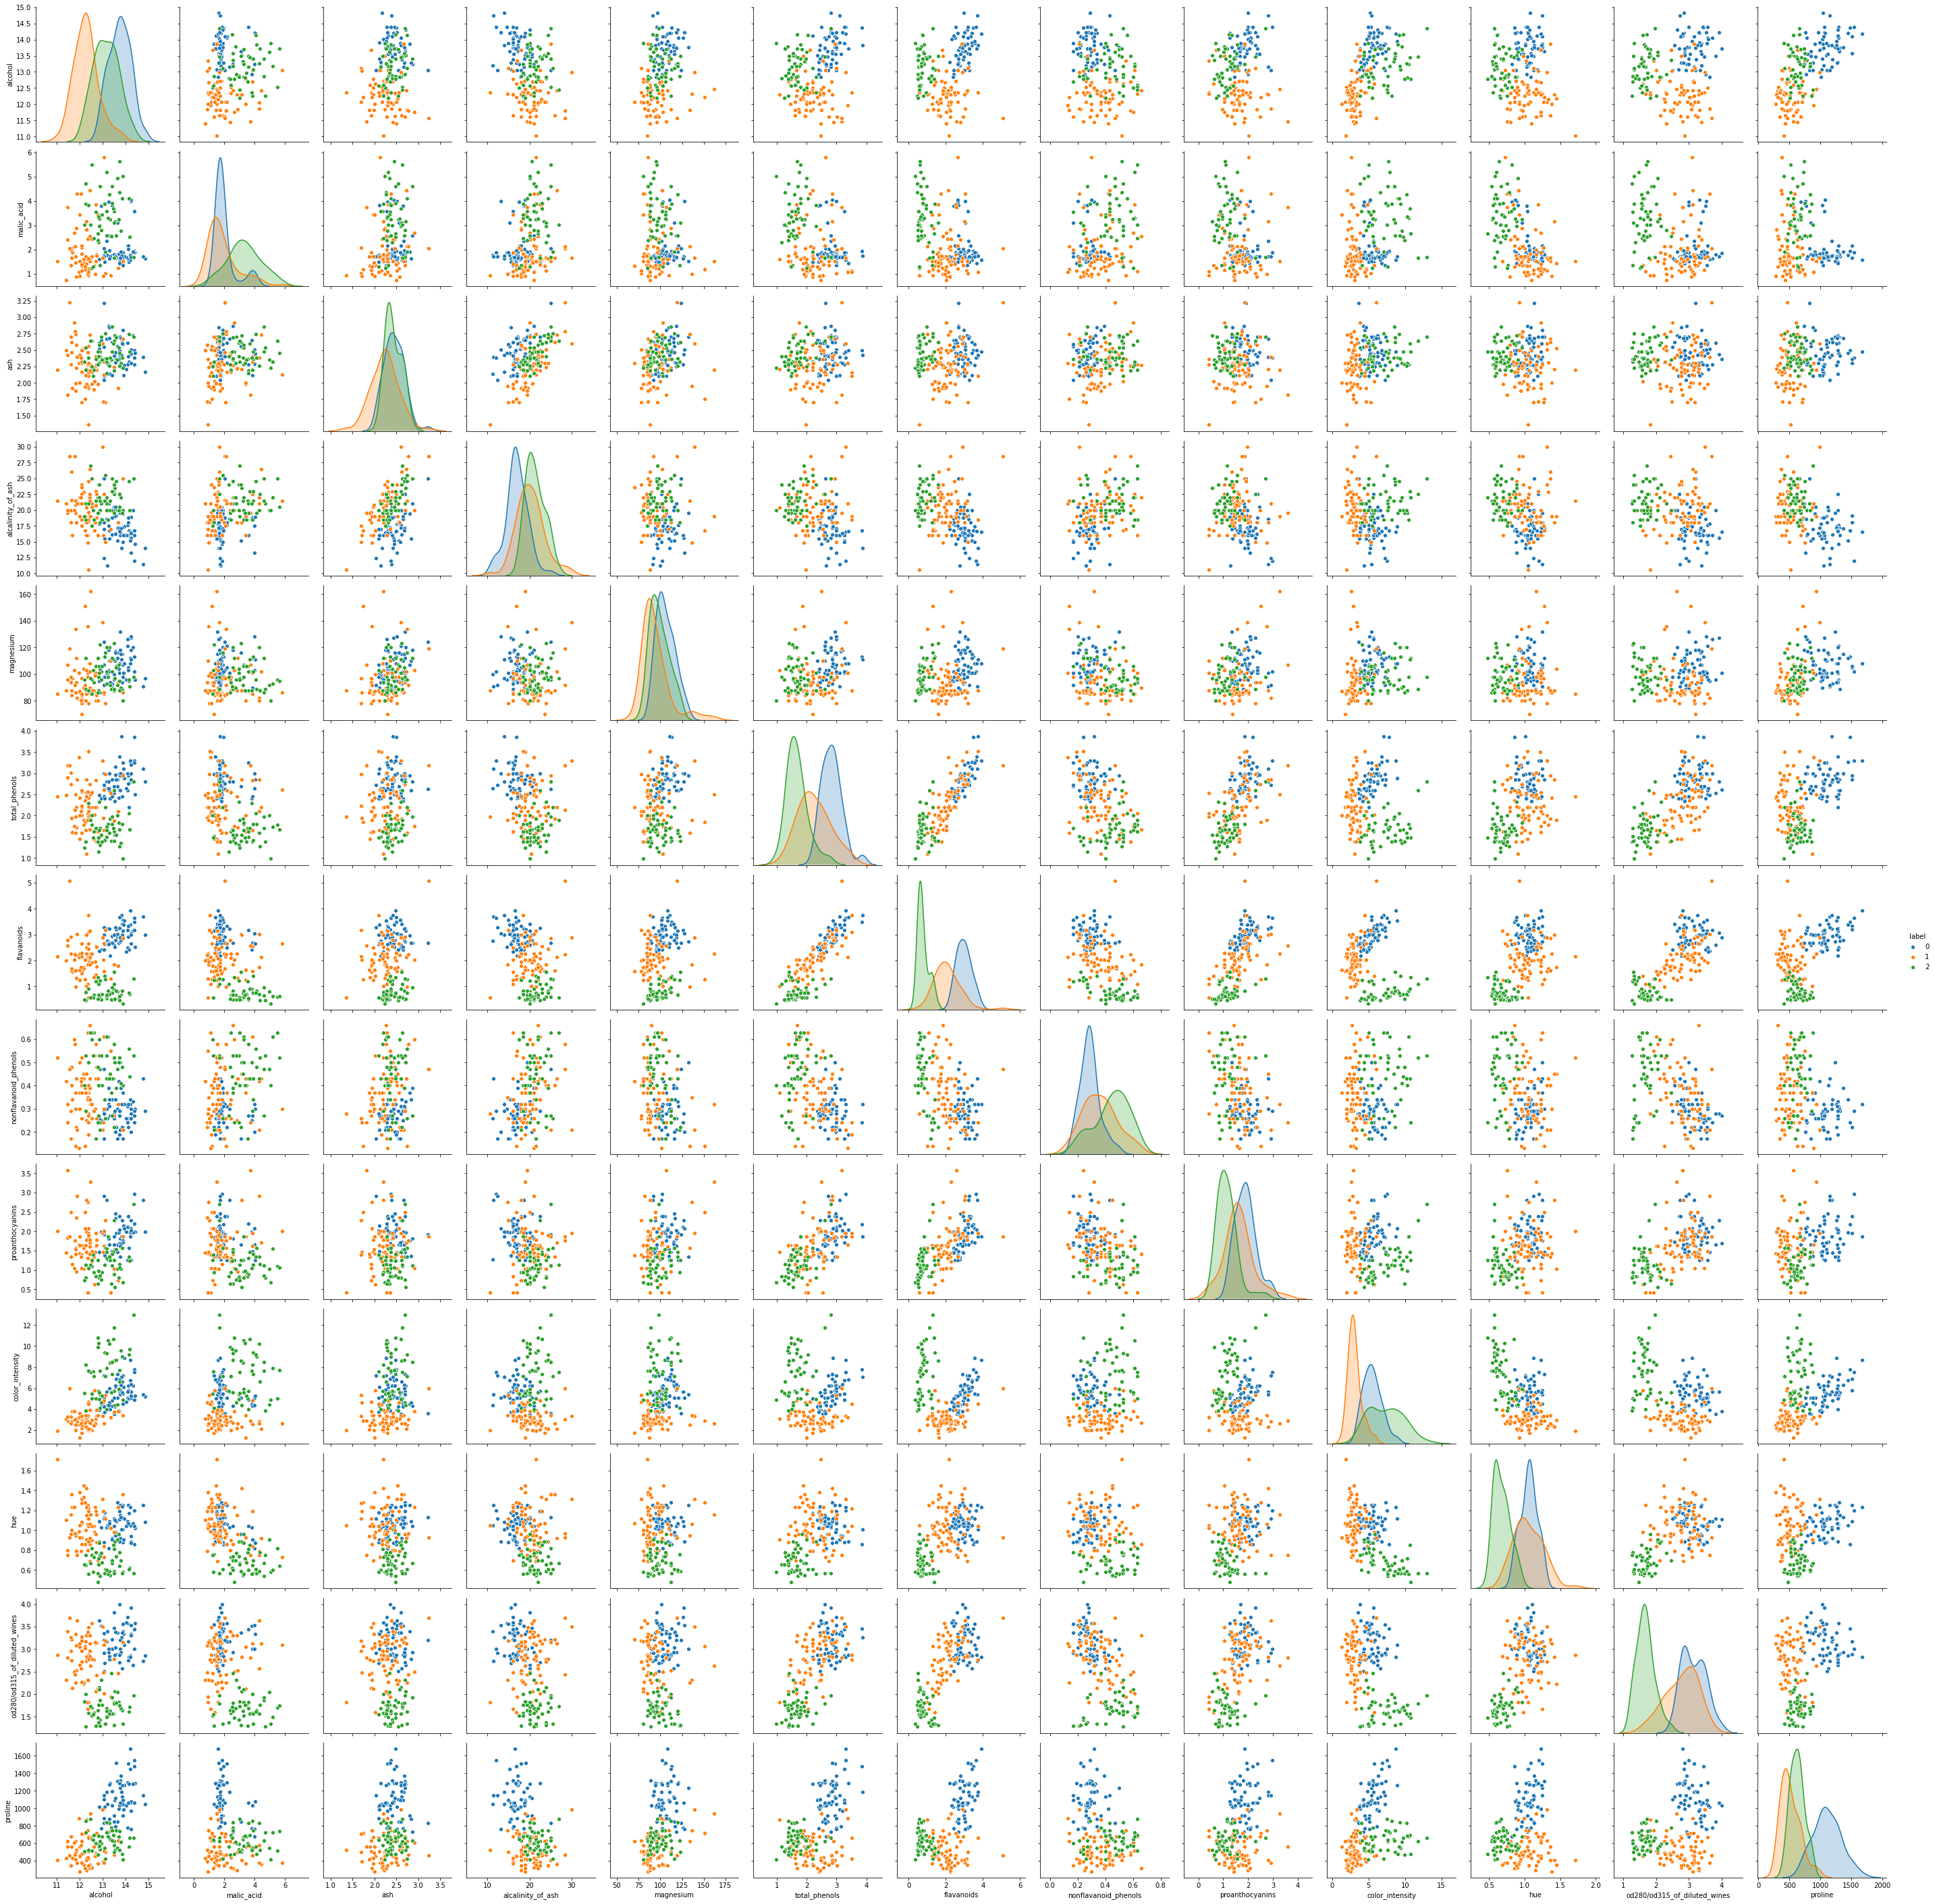

In [38]:
sns.pairplot(df2, hue="label",size=3)

In [39]:
df2.iloc[:,0:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [40]:
data_X2 = preprocessing.scale(df2.iloc[:,0:-1])#正規化
data_y2 = to_categorical(df2.iloc[:,-1])#one-hot　ベクトル化

In [41]:
#トレーニングデータとテストデータに分類


X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y2, test_size=0.3, random_state=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 153       
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


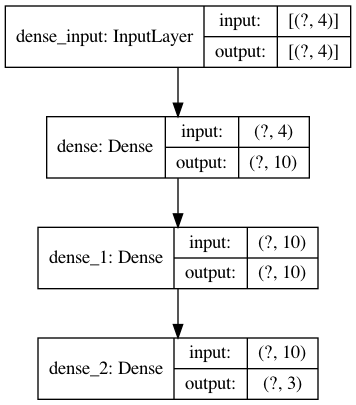

In [42]:
model3= Sequential()#モデルの宣言
model3.add(Dense(30,activation ="relu",input_dim=13))#1層目
model3.add(Dense(50,activation="relu"))#2層目
model3.add(Dense(50,activation="relu"))#3層目
model3.add(Dense(3,activation="softmax"))#4層目

model3.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics = ["accuracy"],
              )

model3.summary()
plot_model(
    model1,
    show_shapes=True,
)

In [43]:
history3 = model3.fit(X_train,y_train,
                   epochs=20,
                     verbose=2#出力形式→0:表示なし,1;プログラスバー,2:1行の簡潔なログ
                   )

Epoch 1/20
4/4 - 0s - loss: 1.0006 - accuracy: 0.5887
Epoch 2/20
4/4 - 0s - loss: 0.8675 - accuracy: 0.7258
Epoch 3/20
4/4 - 0s - loss: 0.7526 - accuracy: 0.8387
Epoch 4/20
4/4 - 0s - loss: 0.6526 - accuracy: 0.9274
Epoch 5/20
4/4 - 0s - loss: 0.5619 - accuracy: 0.9435
Epoch 6/20
4/4 - 0s - loss: 0.4776 - accuracy: 0.9597
Epoch 7/20
4/4 - 0s - loss: 0.4046 - accuracy: 0.9677
Epoch 8/20
4/4 - 0s - loss: 0.3397 - accuracy: 0.9677
Epoch 9/20
4/4 - 0s - loss: 0.2847 - accuracy: 0.9758
Epoch 10/20
4/4 - 0s - loss: 0.2393 - accuracy: 0.9758
Epoch 11/20
4/4 - 0s - loss: 0.2014 - accuracy: 0.9758
Epoch 12/20
4/4 - 0s - loss: 0.1726 - accuracy: 0.9758
Epoch 13/20
4/4 - 0s - loss: 0.1465 - accuracy: 0.9758
Epoch 14/20
4/4 - 0s - loss: 0.1258 - accuracy: 0.9758
Epoch 15/20
4/4 - 0s - loss: 0.1090 - accuracy: 0.9758
Epoch 16/20
4/4 - 0s - loss: 0.0945 - accuracy: 0.9758
Epoch 17/20
4/4 - 0s - loss: 0.0810 - accuracy: 0.9758
Epoch 18/20
4/4 - 0s - loss: 0.0703 - accuracy: 0.9919
Epoch 19/20
4/4 - 0

In [44]:
accuracy = history3.history["accuracy"]
loss = history3.history["loss"]
epochs = range(1, len(loss) + 1)

<function matplotlib.pyplot.show(*args, **kw)>

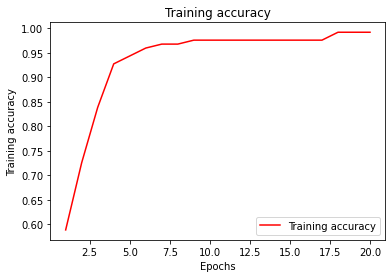

In [45]:
plt.plot(epochs,accuracy,color="red",label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.legend()
plt.show

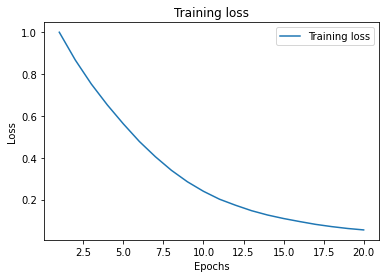

In [46]:
plt.plot(epochs, loss, label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [47]:
loss,accuracy = model3.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.0489741750061512
accuracy: 1.0
